# ME460 Linkages - Prof. Mark Ganter
# 3 position motion generator via dyad-standard  equations

posl2= d1*(-1.0 + 1.0*I)*exp(I*t1) + d2*(-0.0729 + 0.375*I)*exp(I*t2) + 6.0 - 11.0*I
posl3= d1*(-1.95 - 0.309*I)*exp(I*t1) + d2*(-0.625 + 0.927*I)*exp(I*t2) + 17.0 - 13.0*I

left 3pos solution r1,t1,r2,t2 = 5.77508203859185 4.776557112449485 15.0165420300560 -13.351899984103913
abs(posl2)= 0.000760
abs(posl3)= 0.00223

posr2= d3*(-0.234 + 0.643*I)*exp(I*t3) + d4*(-0.0729 + 0.375*I)*exp(I*t4) + 6.0 - 11.0*I
posr3= d3*(-0.708 + 0.956*I)*exp(I*t3) + d4*(-0.625 + 0.927*I)*exp(I*t4) + 17.0 - 13.0*I

right 3pos solution  r3,t3,r4,t4 = 18.3858407468763 -2.070040386508121 6.11899366715782 103.42582187988009
abs(posr2)= 0.00212
abs(posr3)= 0.00369

phi2 = 90.0 phi3 = 198.0
psi2 = 40.0 psi3 = 73.0
gamma2 = 22.0 gamma3 = 68.0
del2 = -6.0 + 11.0*I
del3 = -17.0 + 13.0*I

R1 = ( 5.75 + 0.481*I )  ( 5.78 @ 4.776105399779796 degs)
R2 = ( 14.6 - 3.47*I )  ( 15.0 @ -13.351763072567646 degs)
R2 = ( 18.4 - 0.664*I )  ( 18.4 @ -2.069820526080664 degs)
R4 = ( -1.42 + 5.95*I )  ( 6.12 @ 103.42844310190122 de

<IPython.core.display.Javascript object>


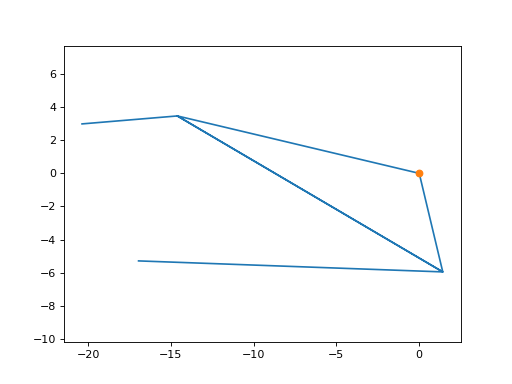

<ipython-input-1-03b059651d97>:113: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal', 'datalim')


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
from sympy import *

import matplotlib
import matplotlib.pyplot as plt

d1,t1,d2,t2 = symbols("d1 t1 d2 t2", real=True)
d3,t3,d4,t4 = symbols("d3 t3 d4 t4", real=True)
g2,g3,g4 = symbols("g2 g3 g4", real=True)
s2,s3,s4 = symbols("s2 s3 s4",real=True)

r1 = d1*exp(I*t1)
r2 = d2*exp(I*t2)
r3 = d3*exp(I*t3)
r4 = d4*exp(I*t4)

#need a C1 to set up plotting
c1 = 0+0*I
# set up deltas
del2 = -6+11*I
del3 = -17+13*I


g2 = radians(22)
g3 = radians(68)

# free choices phi's and psi's
p2 = radians(90)
p3 = radians(198)

s2 = radians(40)
s3 = radians(73)

# LEFT SIDE #

#write out the dyad-standard equations for left side of linkage 
posl2 = r1*(exp(I*p2)-1) + r2*(exp(I*g2)-1) - del2
posl3 = r1*(exp(I*p3)-1) + r2*(exp(I*g3)-1) - del3


print("posl2=",N(posl2,3))
print("posl3=",N(posl3,3))
print()

ansl = nsolve((re(posl2),im(posl2),re(posl3),im(posl3)), (d1, t1, d2, t2), (5,radians(10),2 ,radians(-50)), 
            maxsteps=100, tol=1.0e-3, verify=false)

print("left 3pos solution r1,t1,r2,t2 =",ansl[0],degrees(ansl[1]),ansl[2],degrees(ansl[3]))
print ("abs(posl2)=",N(abs(posl2.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3]}) ),3))
print ("abs(posl3)=",N(abs(posl3.evalf(subs={d1:ansl[0],t1:ansl[1],d2:ansl[2],t2:ansl[3]}) ),3))
print()


# RIGHT SIDE #

#write out the dyad-standard equations for right side of linkage 
posr2 = r3*(exp(I*s2)-1) + r4*(exp(I*g2)-1) - del2
posr3 = r3*(exp(I*s3)-1) + r4*(exp(I*g3)-1) - del3

print("posr2=",N(posr2,3))
print("posr3=",N(posr3,3))
print()

ans = nsolve((re(posr2),im(posr2),re(posr3),im(posr3)), (d3, t3, d4, t4), (1,radians(100), 2 ,radians(50)), 
            maxsteps=100, tol=1.0e-3, verify=false)

print("right 3pos solution  r3,t3,r4,t4 =",ans[0],degrees(ans[1]),ans[2],degrees(ans[3]))
print ("abs(posr2)=",N(abs(posr2.evalf(subs={d3:ans[0],t3:ans[1],d4:ans[2],t4:ans[3]}) ),3))
print ("abs(posr3)=",N(abs(posr3.evalf(subs={d3:ans[0],t3:ans[1],d4:ans[2],t4:ans[3]}) ),3))
print()

evalr1 = N(r1.evalf(subs={d1:ansl[0],t1:ansl[1]}),3)
evalr2 = N(r2.evalf(subs={d2:ansl[2],t2:ansl[3]}),3)
evalr3 = N(r3.evalf(subs={d3:ans[0],t3:ans[1]}),3)
evalr4 = N(r4.evalf(subs={d4:ans[2],t4:ans[3]}),3)
evalr5 = evalr2-evalr4
evalr6 = evalr1+evalr2-evalr4-evalr3

print("phi2 =",degrees(p2),"phi3 =",degrees(p3))
print("psi2 =",degrees(s2),"psi3 =",degrees(s3))
print("gamma2 =",degrees(g2),"gamma3 =",degrees(g3))
print("del2 =",N(del2.evalf(),3))
print("del3 =",N(del3.evalf(),3))
print()

print("R1 = (",evalr1,")  (", abs(evalr1),"@",degrees(arg(evalr1)),"degs)")
print("R2 = (",evalr2,")  (", abs(evalr2),"@",degrees(arg(evalr2)),"degs)")
print("R2 = (",evalr3,")  (", abs(evalr3),"@",degrees(arg(evalr3)),"degs)")
print("R4 = (",evalr4,")  (", abs(evalr4),"@",degrees(arg(evalr4)),"degs)")
print("R5 = (",evalr5,")  (", abs(evalr5),"@",degrees(arg(evalr5)),"degs)")
print("R6 = (",evalr6,")  (", abs(evalr6),"@",degrees(arg(evalr6)),"degs)")
print()

evalOa = c1-evalr2-evalr1 
evalA = c1-evalr2
evalB = c1-evalr4
evalOb = c1-evalr4-evalr3

print("Oa = (",evalOa,")")
print("A = (",evalA,")")
print("C = (",c1,")")
print("B = (",evalB,")")
print("Ob = (",evalOb,")")

# call matplotlib routines for a scatter plot    
plt.plot([re(evalOa),re(evalA),re(c1),re(evalB),re(evalA),re(evalB),re(evalOb)],
    [im(evalOa),im(evalA),im(c1),im(evalB),im(evalA),im(evalB),im(evalOb)],
    [re(c1)],[im(c1)],'o')
plt.axes().set_aspect('equal', 'datalim')
plt.show()